In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [2]:
housing = pd.read_csv("Ames_Housing_Price_Data.csv", index_col=0)

#### Extra Trees on all Features

In [21]:
extra1 = housing.copy()

In [24]:
extra1 = extra1.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [25]:
extra1 = extra1.replace({"Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

In [26]:
extra1 = extra1.replace(np.nan, 0)

In [27]:
extra1 = extra1.drop('SalePrice', 1)

In [28]:
extra1 = pd.get_dummies(extra1)

In [29]:
extra1 = extra1.replace(np.nan, 0)

In [7]:
m = housing.copy()
m['SalePrice1'] = np.log10(m['SalePrice'])
m['SalePrice1'] = m['SalePrice1'].astype(np.int64)
y1 = m['SalePrice1']

In [31]:
X1 = extra1.iloc[:,1:257]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[3.23785789e-02 7.71236670e-03 8.60780490e-03 1.59375181e-02
 3.14134737e-02 2.60389676e-02 8.70858231e-03 1.88299131e-02
 4.38987450e-03 8.19712528e-03 5.28137378e-03 1.46708754e-02
 9.82954528e-03 6.15850525e-03 1.10905075e-02 1.79598077e-03
 2.50082698e-03 1.16171687e-02 1.50766620e-02 7.82693657e-03
 1.31271056e-02 8.44133244e-03 1.12790908e-03 6.52477319e-03
 3.16859258e-03 1.22343272e-02 3.84084076e-03 1.52591140e-02
 2.26571659e-03 6.02183253e-03 1.03491657e-02 8.41118044e-03
 7.80143285e-03 1.09548264e-02 2.02702680e-02 1.80572764e-02
 1.06683238e-02 7.05767837e-03 5.57685317e-03 5.91059041e-03
 7.55194850e-03 1.22040484e-03 1.05518159e-03 0.00000000e+00
 0.00000000e+00 1.82727111e-03 8.98381915e-03 7.86844965e-03
 5.06438442e-04 9.02182619e-03 0.00000000e+00 0.00000000e+00
 1.16762196e-03 5.24271078e-03 1.58154333e-02 4.20564926e-04
 8.12927651e-04 3.05081051e-03 4.60085173e-03 1.81051924e-06
 2.79534310e-03 2.81354690e-04 4.41340690e-04 5.51702806e-03
 6.04712210e-04 1.593411

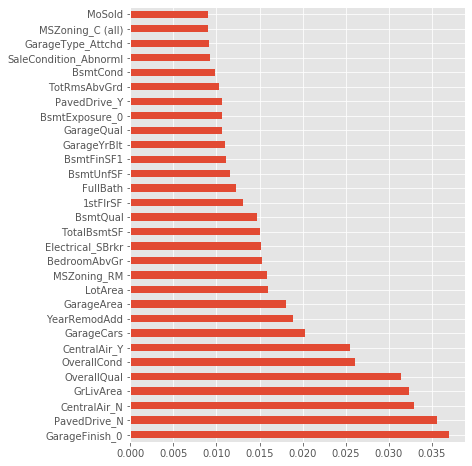

In [32]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X1,y1)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(6,8))
plt.show()

#### Lasso

In [33]:
model2 = housing.copy()

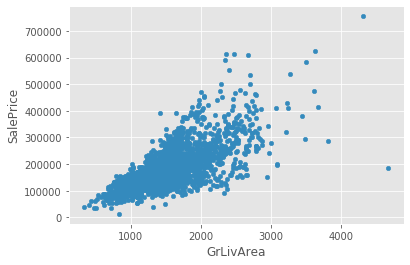

In [36]:
GrPrice = pd.concat([model2['SalePrice'], model2['GrLivArea']], axis=1)
GrPrice.plot.scatter(x='GrLivArea', y='SalePrice')

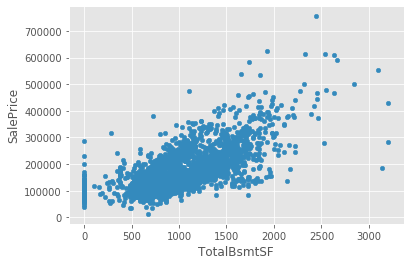

In [37]:
BsmtPrice = pd.concat([model2['SalePrice'], model2['TotalBsmtSF']], axis=1)
BsmtPrice.plot.scatter(x='TotalBsmtSF', y='SalePrice')

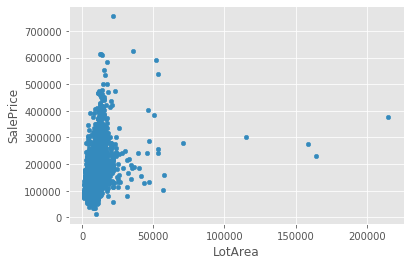

In [39]:
LotPrice = pd.concat([model2['SalePrice'], model2['LotArea']], axis=1)
LotPrice.plot.scatter(x='LotArea', y='SalePrice')

In [55]:
clean_df = housing.copy()

In [56]:
clean_df = clean_df.loc[(clean_df['GrLivArea']<4000) & (clean_df['LotArea']<100000)\
                        & (clean_df['TotalBsmtSF']<3000),:]

In [59]:
clean_df.drop(columns='GarageYrBlt', inplace=True)

In [60]:
clean_df.PoolQC.fillna(0, inplace=True)
clean_df.PoolQC = clean_df.PoolQC.replace({"Fa":1, "TA":2, "Gd":3,"Ex":4})

In [61]:
clean_df['Shed'] = clean_df.MiscFeature=='Shed'
clean_df.Shed = clean_df.Shed.astype(int)

clean_df['Gar2'] = clean_df.MiscFeature=='Gar2'
clean_df.Gar2 = clean_df.Gar2.astype(int)

clean_df.drop(columns='MiscFeature', inplace=True)

In [62]:
clean_df.Fence.fillna(0, inplace=True)
clean_df.Fence = clean_df.Fence.replace({'MnWw':1,'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [63]:
clean_df.GarageFinish.fillna(0, inplace=True)
clean_df.GarageFinish = clean_df.GarageFinish.replace({'Unf':1,'Rfn':2, 'Fin':3})

In [64]:
clean_df.Utilities = clean_df.Utilities.replace({'AllPub':1,'NoSewr':0})

In [65]:
clean_df.Condition1 = clean_df.Condition1.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})
clean_df.Condition2 = clean_df.Condition2.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})

In [66]:
clean_df.BldgType = clean_df.BldgType.replace({'2fmCon':1,'Twnhs':2, 'Duplex':3, '1Fam':4, 'TwnhsE':5})

In [67]:
clean_df.HouseStyle = clean_df.HouseStyle.replace({'1.5Unf':1,'1.5Fin':2, 'SFoyer':3, 'SLvl':4, '1Story':5, '2.5Unf':6, '2Story':7, '2.5Fin':8})

In [68]:
clean_df.Neighborhood = clean_df.Neighborhood.replace({'MeadowV':1,'BrDale':2, 'IDOTRR':3, 'BrkSide':4, 'OldTown':5, 'Edwards':6, 'SWISU':7, 'Landmrk':8, 'Sawyer':9,\
                           'NPkVill':10, 'Blueste':11, 'NAmes':12, 'Mitchel':13, 'SawyerW':14, 'Gilbert':15, 'NWAmes':16, 'Greens':17, 'Blmngtn':18,\
                           'CollgCr':19, 'Crawfor':20, 'ClearCr':21, 'Somerst':22, 'Timber':23, 'Veenker':24, 'GrnHill':25, 'StoneBr':26,'NridgHt':27, 'NoRidge':28})

In [69]:
clean_df.Alley = clean_df.Alley.replace({'Grvl':1,'Pave':2,'None':3})

In [70]:
clean_df['GrPorchArea']=clean_df['OpenPorchSF']+clean_df['EnclosedPorch']+clean_df['3SsnPorch'] + clean_df['ScreenPorch']
clean_df.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

In [71]:
clean_df['Pool_YN']=clean_df.PoolArea.apply(lambda x: 1 if x>0 else(0))
clean_df.drop(columns='PoolArea',inplace=True)

In [72]:
clean_df = clean_df.replace({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
clean_df = clean_df.replace({"Unf":1, "LwQ":2, "Rec":3, "BLQ":4, "ALQ":5, "GLQ":6})

In [73]:
clean_df = clean_df.replace(np.nan, 0)

In [75]:
clean_df = pd.get_dummies(clean_df)

In [76]:
clean_df['SalePriceLog'] = np.log10(clean_df['SalePrice'])
clean_df['SalePriceLog'] = clean_df['SalePriceLog'].astype(np.int64)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    clean_df.drop(labels=['SalePrice', 'SalePriceLog'], axis=1),
    clean_df['SalePriceLog'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1799, 190), (771, 190))

In [79]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [81]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 190
selected features: 94
features with coefficients shrank to zero: 96


In [82]:
np.sum(sel_.estimator_.coef_ == 0)

96

In [83]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['PID', 'LotFrontage', 'Utilities', 'ExterQual', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageCars', 'GarageArea',
       'GarageQual', 'PoolQC', 'MiscVal', 'Gar2', 'Pool_YN',
       'MSZoning_A (agr)', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_I (all)', 'MSZoning_RH', 'Street_Grvl', 'Street_Pave',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev',
       'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_

In [85]:
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))

In [86]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train_selected, y_train)
print("R^2 for train set: %f" %ols.score(X_train_selected, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test_selected, y_test))

R^2 for train set: 0.489891
--------------------------------------------------
R^2 for test  set: 0.302988


In [89]:
X2 = clean_df.drop(columns = ['SalePrice','SalePriceLog'])

In [91]:
y2 = clean_df[['SalePriceLog']]
y2

,SalePriceLog
1,5
2,5
3,5
4,5
5,5
...,...
759,5
760,5
761,5
762,5


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[9.27317529e-03 3.72591148e-02 1.08910004e-02 9.38090207e-03
 1.10571876e-02 5.94346288e-03 2.82797339e-04 2.14892054e-02
 3.01214341e-03 8.18391735e-04 5.31919762e-03 7.67579404e-03
 3.76418325e-02 1.90738421e-02 9.95628988e-03 2.39722465e-02
 3.59163369e-03 4.94181024e-03 5.14141620e-03 1.50155816e-02
 2.49940822e-02 8.65066596e-03 1.18017918e-02 4.19143345e-03
 5.34683662e-03 9.00592721e-03 2.59271630e-02 1.08769595e-02
 2.27249980e-02 1.40727545e-02 4.63248974e-04 9.14047874e-03
 3.76347142e-03 1.03248772e-02 3.50223580e-03 1.60643855e-02
 1.50303993e-03 6.68481168e-03 2.05021297e-02 9.86700972e-03
 1.25550181e-02 2.48511689e-02 7.89793375e-03 5.16689021e-03
 3.17289212e-02 5.73368908e-03 0.00000000e+00 5.24037469e-03
 1.94245317e-03 7.19924880e-03 7.86427066e-03 1.22336034e-03
 7.74764022e-04 1.20102855e-02 0.00000000e+00 5.52056895e-04
 4.75956463e-03 9.81352405e-04 0.00000000e+00 1.07905130e-03
 2.02728703e-02 6.63183192e-03 9.72190665e-04 1.91086002e-03
 4.99488124e-03 2.168112

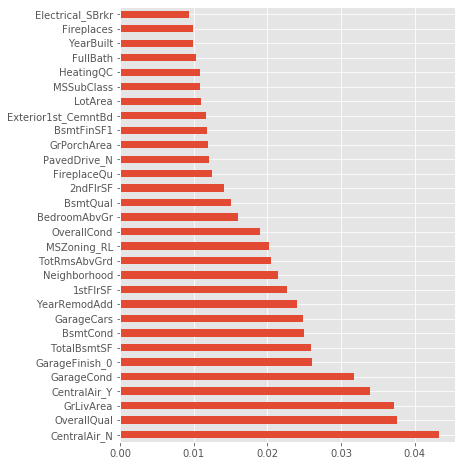

In [93]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X2,y2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X2.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(6,8))
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X2,y2,test_size=0.25)

In [95]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
lasso = Lasso()
ridge = Ridge()

In [96]:
ss.fit(Xtrain)
Xs_train = ss.transform(Xtrain)

In [97]:
params_lasso = [{'alpha':[1e-4, 1e-2, 0.1, 1, 2, 20]}]
params_ridge = [{'alpha':[1e-4, 1e-2, 0.1, 1, 2, 10]}]

In [101]:
from sklearn.model_selection import KFold

In [104]:
from sklearn.model_selection import GridSearchCV, KFold

kf5 = KFold(n_splits=5, shuffle=True)

grid_lasso = GridSearchCV(estimator=lasso, param_grid=params_lasso, cv=kf5)
grid_ridge = GridSearchCV(estimator=ridge, param_grid=params_ridge, cv=kf5)

grid_lasso.fit(Xs_train, ytrain)
grid_ridge.fit(Xs_train, ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.01, 0.1, 1, 2, 10]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
grid_lasso.best_score_

0.37049407441235976

In [106]:
grid_ridge.best_score_

0.3533521711968728